In [1]:
library(ggplot2)
options(repr.plot.width=5, repr.plot.height=5) # Size of the plots

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
brain.df <- read.csv("brain.csv")
str(brain.df)

'data.frame':	237 obs. of  3 variables:
 $ gender      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ head_size   : int  4512 3738 4261 3777 4177 3585 3785 3559 3613 3982 ...
 $ brain_weight: int  1530 1297 1335 1282 1590 1300 1400 1255 1355 1375 ...


# <font color='#FD7C6E'> Linear Model </font> 

In [3]:
model = lm(brain_weight ~ head_size, data = brain.df)
summary(model)

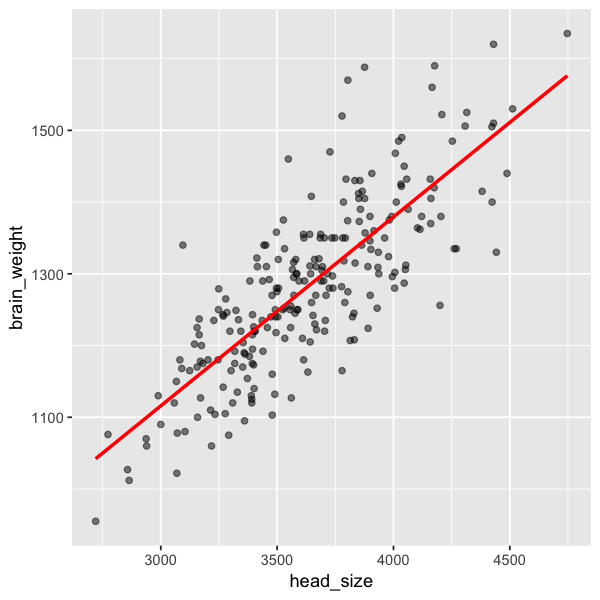

In [5]:
ggplot(data=brain.df, aes(head_size, brain_weight)) + geom_point(color="black", alpha = 0.5) + geom_line(data = fortify(model), aes(y = .fitted), color="red", size=1)

# <font color='#FD7C6E'> Predictions </font> 

In [6]:
predict(model, data.frame(head_size=c(4000)))

1 
1379.291

In [7]:
predict(model, data.frame(head_size=c(3000,3500)))

1        2 
1115.861 1247.576

# <font color='#FD7C6E'> Assumptions </font> 

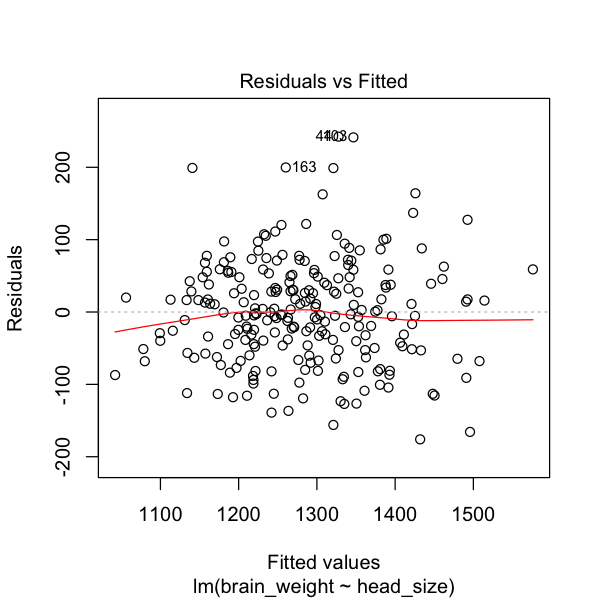

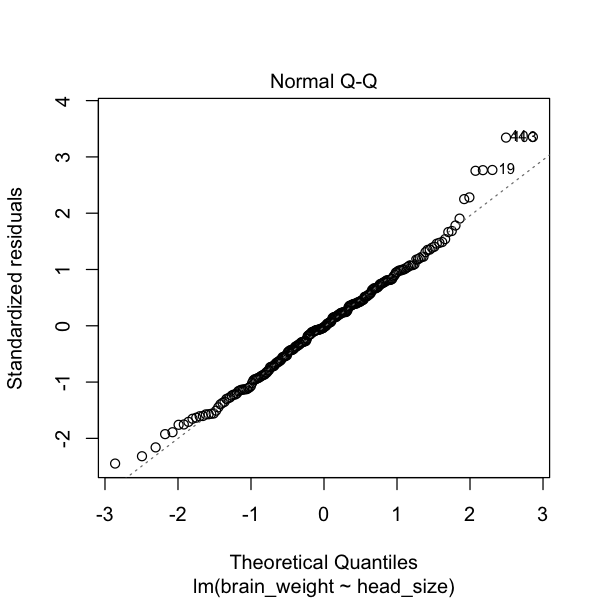

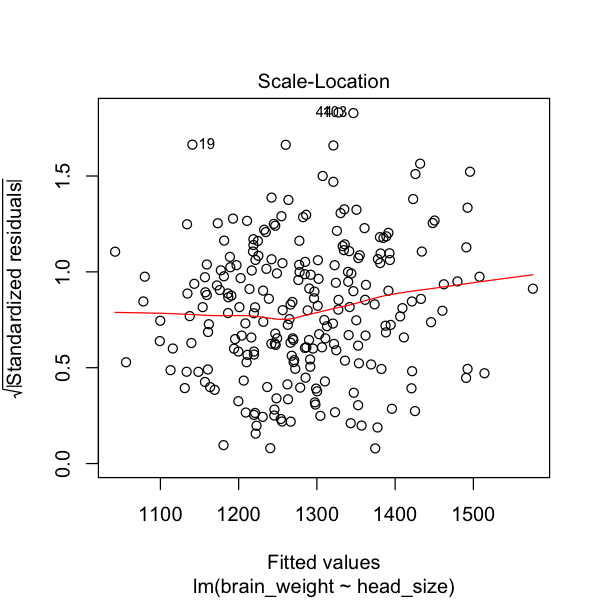

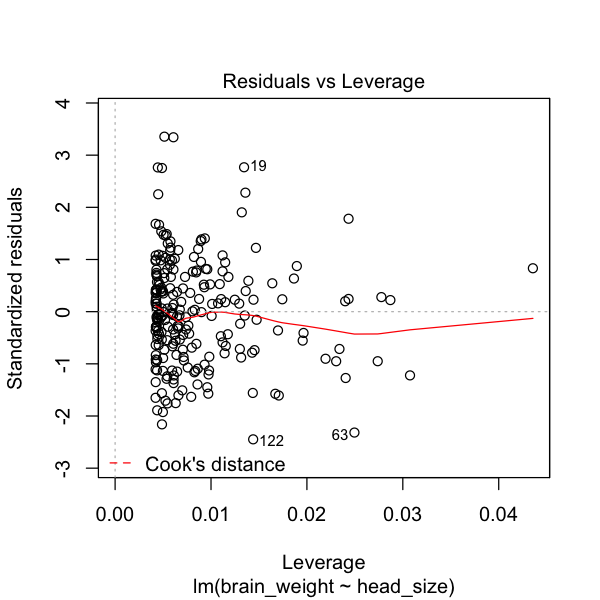

In [8]:
plot(model)

We are not sure about the Q-Q plot, lets tests for normality:

In [9]:
shapiro.test(residuals(model))


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.98641, p-value = 0.02364


# <font color='#FD7C6E'> Outliers </font> 

In [10]:
brain.leverages <- hatvalues(model)
which.max(brain.leverages)

25 
25

In [11]:
brain.df[25, ]

,gender,head_size,brain_weight
25,1,4747,1635


In [12]:
brain.stdresiduals <- rstandard(model)
brain.stdresiduals[25]

25 
0.8319366

In [13]:
brain.stdresiduals[abs(brain.stdresiduals)>2]

5        19        44        63        65        96       103       122 
 2.281034  2.767827  3.354643 -2.317288  2.250437 -2.160188  3.342842 -2.447393 
      162       163 
 2.753329  2.764523

Data points with standardized residuals bigger than 3 are considered outliers, let's take them out

In [14]:
brain.df <- brain.df[-c(103, 44), ]

Let's redo the linear model

In [15]:
model = lm(brain_weight ~ head_size, data = brain.df)
summary(model)

In [17]:
shapiro.test(residuals(model))


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.99377, p-value = 0.4379


# <font color='#FD7C6E'> US Dataset </font> 

Let's use again the US elections dataset, to go from previous correlations to relations

In [18]:
us.df <- read.csv("us_elections.csv")
str(us.df)

'data.frame':	3111 obs. of  17 variables:
 $ state            : Factor w/ 50 levels "Alabama","Arizona",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ county           : Factor w/ 1808 levels "Abbeville","Acadia",..: 79 86 97 145 160 218 228 239 286 308 ...
 $ trump            : int  18172 72883 5454 6738 22859 1140 4901 32865 7843 8953 ...
 $ clinton          : int  5936 18458 4871 1874 2156 3530 3726 13242 5784 1547 ...
 $ romney           : int  17379 66016 5550 6132 20757 1251 5087 30278 7626 7506 ...
 $ obama            : int  6363 18424 5912 2202 2970 4061 4374 15511 6871 2132 ...
 $ voting_population: int  40690 151770 20375 17590 42430 8195 15425 88525 26480 20505 ...
 $ white_pct        : num  75.7 83.2 45.9 74.8 87.7 ...
 $ black_pct        : num  18.37 9.23 47.89 21.21 1.56 ...
 $ hispanic_pct     : num  2.57 4.37 4.31 2.22 8.73 ...
 $ foreignborn_pct  : num  1.84 3.27 2.86 1.35 4.27 ...
 $ female_pct       : num  51.2 51.2 46.5 46.5 50.5 ...
 $ age29andunder_pct: num  40 35.5 37.7 37.3 37.

In [19]:
us.df$trump_pct <- us.df$trump / us.df$voting_population * 100
us.df$clinton_pct <- us.df$clinton / us.df$voting_population * 100
us.df$obama_pct <- us.df$obama / us.df$voting_population * 100
us.df$romney_pct <- us.df$romney / us.df$voting_population * 100

## Activity 1: Create the following linear model, is it significant? plot it, look at the assumptions and use the Shapiro test to prove the QQ-plot
\begin{equation*}
Trump\% = \beta_0 + \beta_1 * White\%
\end{equation*}

In [20]:
model = lm(trump_pct ~ white_pct, data = us.df)
summary(model)


Call:
lm(formula = trump_pct ~ white_pct, data = us.df)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.172  -5.194  -0.239   4.754  69.949 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.003376   0.610188   19.67   <2e-16 ***
white_pct    0.328498   0.007642   42.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.414 on 3109 degrees of freedom
Multiple R-squared:  0.3727,	Adjusted R-squared:  0.3725 
F-statistic:  1848 on 1 and 3109 DF,  p-value: < 2.2e-16


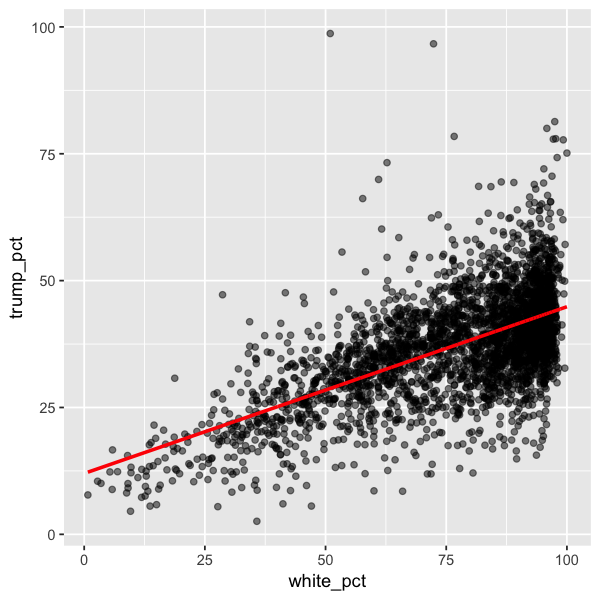

In [21]:
ggplot(data=us.df, aes(white_pct, trump_pct)) + geom_point(color="black", alpha = 0.5) + geom_line(data = fortify(model), aes(y = .fitted), color="red", size=1)

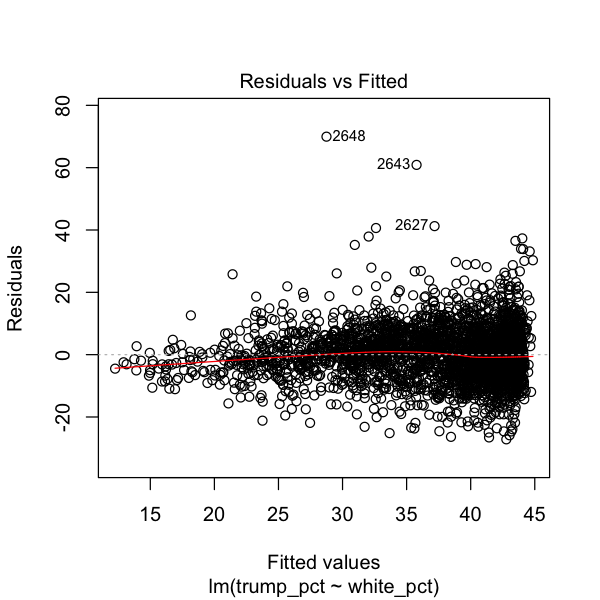

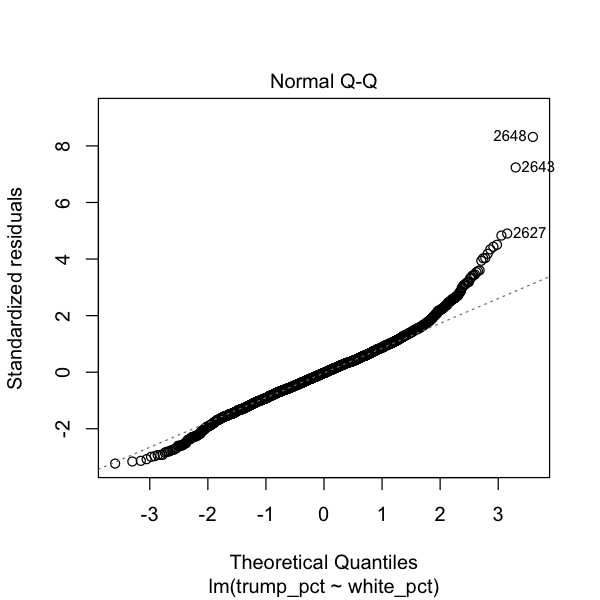

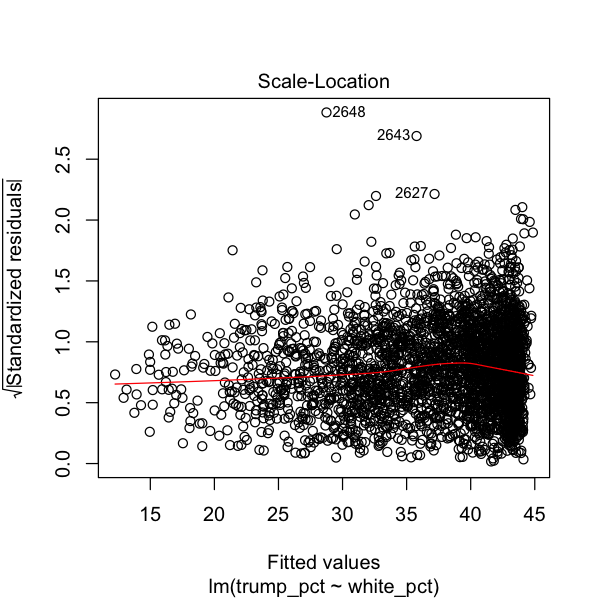

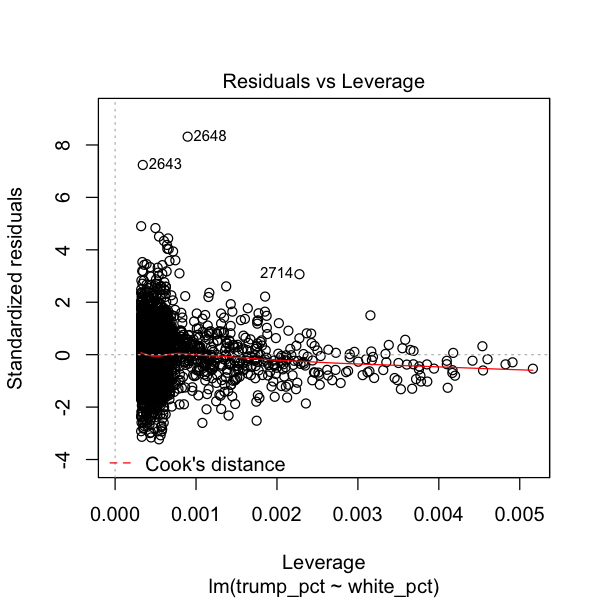

In [22]:
plot(model)

In [23]:
shapiro.test(residuals(model))


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.97062, p-value < 2.2e-16


## Activity 2: Select only the US counties whose white population is smaller than 20% and repeat the complete model/assumptions/Shapiro (Tip: Create a new dataframe)

In [24]:
us.df.white <- us.df[us.df$white_pct<20,]
model = lm(trump_pct ~ white_pct, data = us.df.white)
summary(model)


Call:
lm(formula = trump_pct ~ white_pct, data = us.df.white)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9556 -3.0147  0.0966  2.0559 15.3814 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.5203     1.9142   3.929 0.000298 ***
white_pct     0.4192     0.1396   3.003 0.004395 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.517 on 44 degrees of freedom
Multiple R-squared:  0.1701,	Adjusted R-squared:  0.1512 
F-statistic: 9.019 on 1 and 44 DF,  p-value: 0.004395


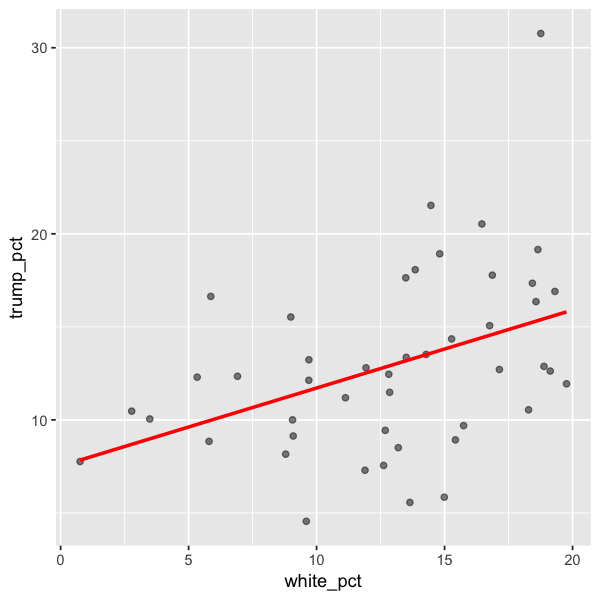

In [25]:
ggplot(data=us.df.white, aes(white_pct, trump_pct)) + geom_point(color="black", alpha = 0.5) + geom_line(data = fortify(model), aes(y = .fitted), color="red", size=1)

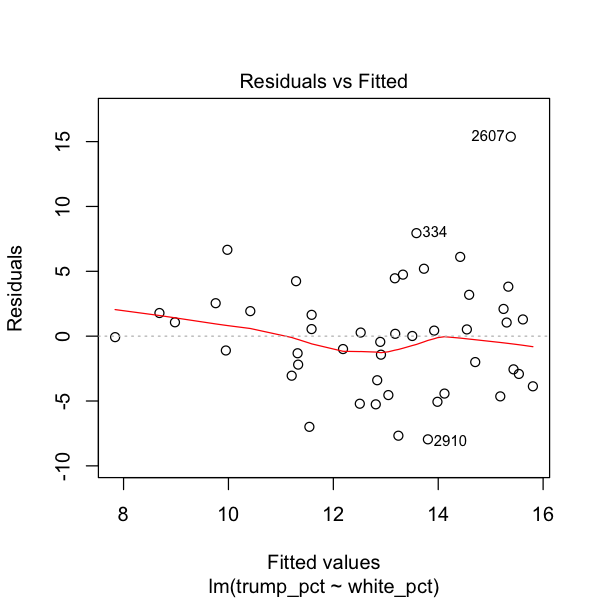

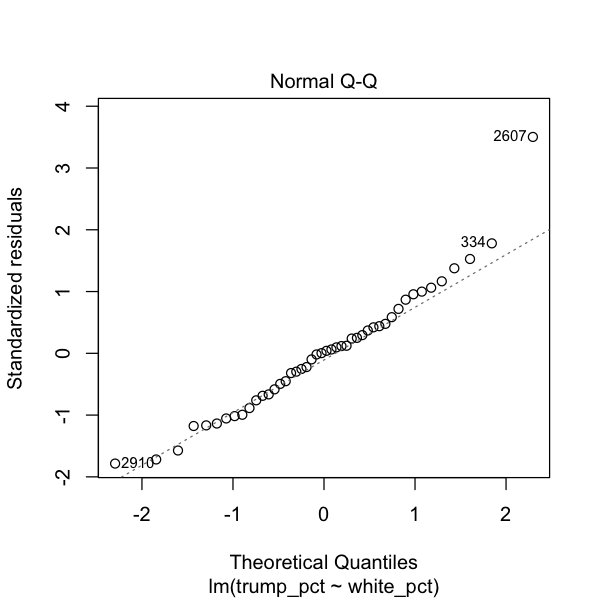

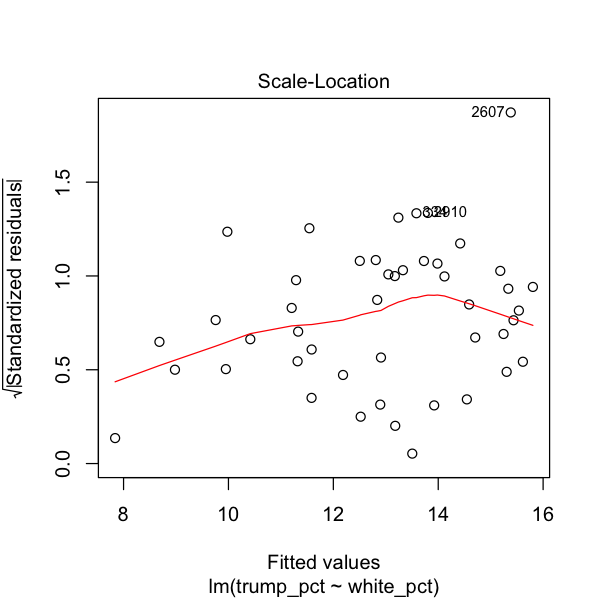

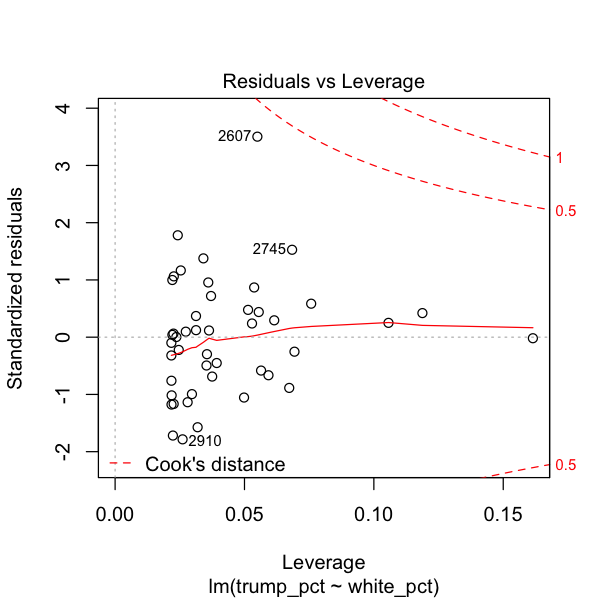

In [26]:
plot(model)

In [27]:
shapiro.test(residuals(model))


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.96052, p-value = 0.1202


## Activity 3: From which state are the two counties with the biggest residuals (absolute value)?

In [33]:
 us.df[c(2910,2607),]

,state,county,trump,clinton,romney,obama,voting_population,white_pct,black_pct,hispanic_pct,...,female_pct,age29andunder_pct,age65andolder_pct,median_income,lesscollege_pct,rural_pct,trump_pct,clinton_pct,obama_pct,romney_pct
2912,Virginia,Portsmouth,12795,28497,12858,32501,72180,38.94307,52.221794,3.880463,...,51.80023,42.34368,13.79813,47050,78.92805,0.00000,17.72652,39.480466,45.02771,17.81380
2608,Texas,Hunt,23910,6396,21011,6671,64090,73.38999,8.224054,14.840347,...,50.65343,40.20636,15.28495,45643,82.67195,56.63133,37.30691,9.979716,10.40880,32.78359


## Activity 4: Remove these two counties with the biggest residuals. Important: remove them from the original us.df dataframe and then select the counties with a white population smaller than 20. Repeat the model/plot/assumptions/Shapiro

In [29]:
us.df <- us.df[-c(2910,2607),]
us.df.white <- us.df[us.df$white_pct<20,]
model = lm(trump_pct ~ white_pct, data = us.df.white)

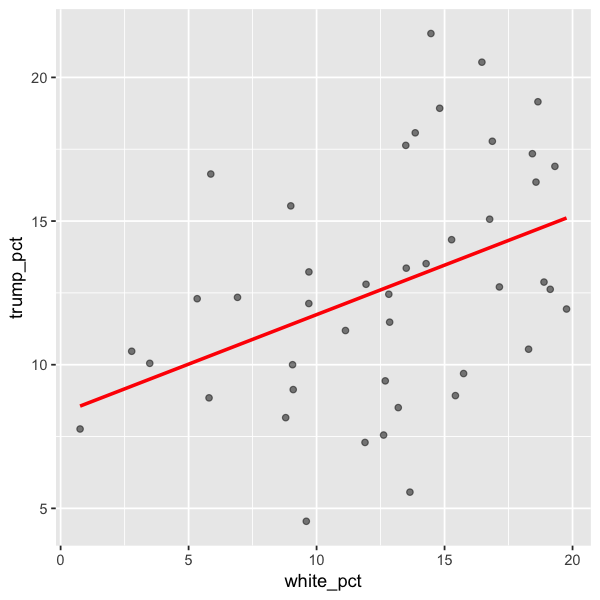

In [30]:
ggplot(data=us.df.white, aes(white_pct, trump_pct)) + geom_point(color="black", alpha = 0.5) + geom_line(data = fortify(model), aes(y = .fitted), color="red", size=1)

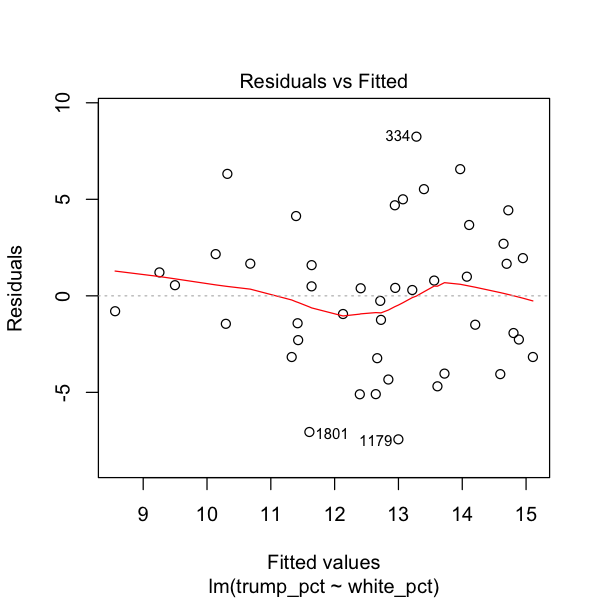

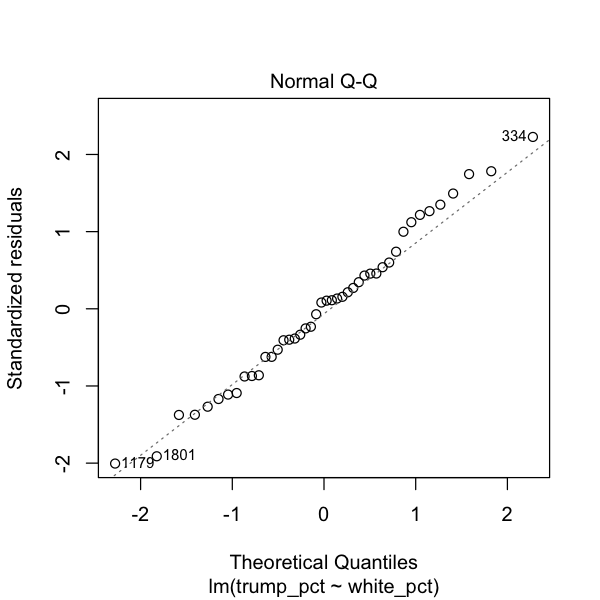

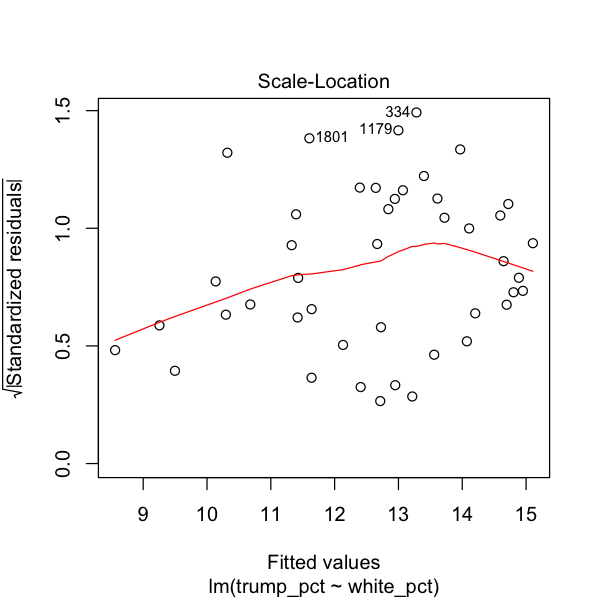

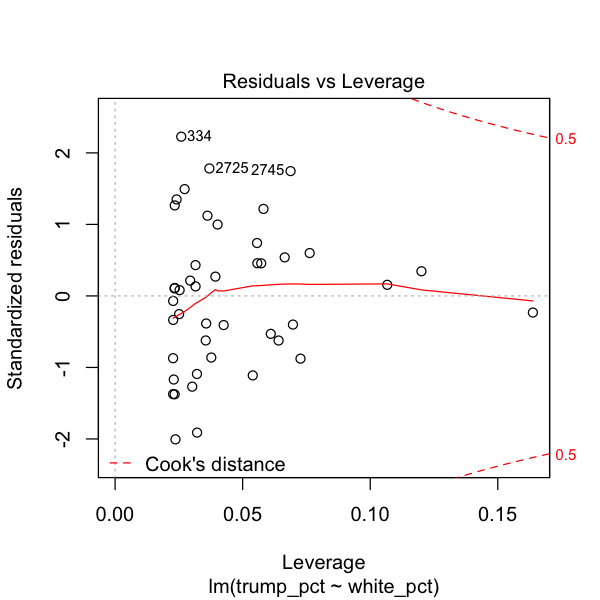

In [31]:
plot(model)

In [32]:
shapiro.test(residuals(model))


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.98792, p-value = 0.9204


## Activity 5: Create more linear models with the US data. Be creative! For example, select only counties from one state (example: California) and test on different candidates